# Load Data ( Positive images / Negative images /Annotation )

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

import cv2

def load_images_from_folder(folder):
    images = []
    filenames = []
    original_sizes = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            original_size = img.shape[:2]  # Capture original size
            original_sizes.append(original_size)
            images.append(img)
            filenames.append(filename)
    return images, filenames, original_sizes

def load_annotations_from_folder(folder, filenames, target_size=(224, 224)):
    annotations = []
    for idx, filename in enumerate(filenames):
        annot_filename = os.path.splitext(filename)[0] + '.txt'
        annot_file = os.path.join(folder, annot_filename)
        boxes = []
        with open(annot_file, 'r') as file:
            for line in file.readlines():
                parts = line.replace('(', '').replace(')', '').replace(',', ' ').split()
                i = 0
                while i < len(parts) - 4:
                    try:
                        x_min = int(float(parts[i].strip()))
                        y_min = int(float(parts[i+1].strip()))
                        x_max = int(float(parts[i+2].strip()))
                        y_max = int(float(parts[i+3].strip()))
                        class_id = int(parts[i+4].strip())
                        boxes.append([x_min, y_min, x_max, y_max, class_id])
                        i += 10
                    except ValueError as e:
                        print(f"Error parsing line '{line}': {e}")
                        i += 10
        annotations.append(boxes)
    return annotations

# Setup directories
base_dir = 'C:\\Users\\azizk'
positive_images_dir = os.path.join(base_dir, 'positive image set')
negative_images_dir = os.path.join(base_dir, 'negative image set')
ground_truth_dir = os.path.join(base_dir, 'ground truth')

# Load images and their original sizes
positive_images, positive_filenames, positive_original_sizes = load_images_from_folder(positive_images_dir)
negative_images, negative_filenames, negative_original_sizes = load_images_from_folder(negative_images_dir)

# Load annotations for positive images
positive_annotations = load_annotations_from_folder(ground_truth_dir, positive_filenames)

# Displaying some sample annotations to verify
for idx, annot in enumerate(positive_annotations[:5]):
    print(f"Annotations for image {idx + 1}: {annot}")

Annotations for image 1: [[563, 478, 630, 573, 1]]
Annotations for image 2: [[575, 114, 635, 162, 1], [72, 305, 133, 369, 1], [210, 317, 273, 384, 1], [306, 374, 344, 420, 1], [447, 531, 535, 632, 1], [546, 605, 625, 707, 1], [632, 680, 720, 790, 1]]
Annotations for image 3: [[100, 256, 170, 319, 1], [575, 139, 668, 240, 1], [753, 382, 843, 484, 1], [313, 648, 415, 764, 1], [434, 674, 527, 787, 1]]
Annotations for image 4: [[227, 106, 268, 155, 1], [318, 126, 370, 185, 1], [445, 88, 516, 168, 1], [363, 336, 438, 420, 1], [455, 331, 529, 415, 1], [68, 316, 170, 411, 1], [69, 423, 180, 525, 1]]
Annotations for image 5: [[401, 596, 443, 636, 1], [606, 138, 668, 199, 1]]


## Positive images with their respecting boundries

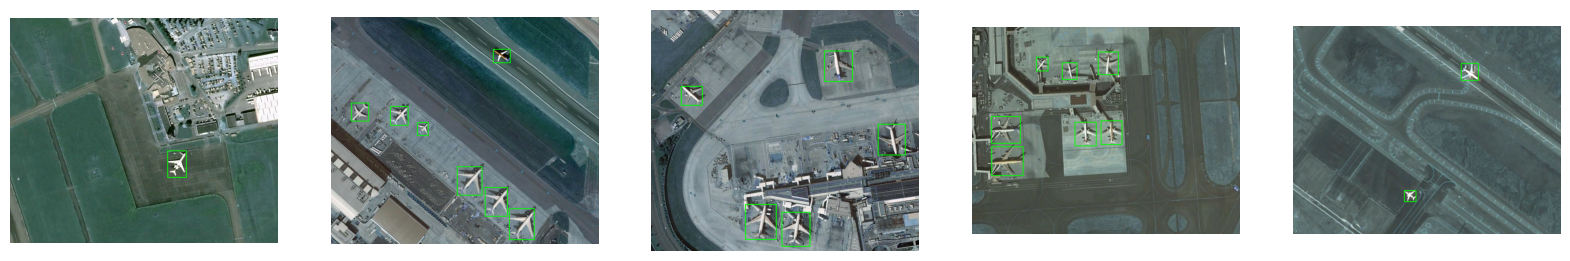

In [2]:
import matplotlib.pyplot as plt
import cv2

# Function to draw bounding boxes on images
def draw_boxes(img, boxes):
    for box in boxes:
        x_min, y_min, x_max, y_max, _ = box
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2) 
    return img

# Example code to draw boxes on the first 5 augmented images
images_with_boxes = []
for img, annot in zip(positive_images[:5], positive_annotations[:5]):
    img_with_boxes = draw_boxes(img.copy(), annot)
    images_with_boxes.append(img_with_boxes)

# Now visualize the images with boxes
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for ax, img in zip(axes, images_with_boxes):
    ax.imshow(img)
    ax.axis('off')
plt.show()


## resizing the images and respcting boundring for the target in the positive images

In [3]:
import cv2

def resize_images(images, target_size=(1024, 1024)):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, target_size)
        resized_images.append(resized_img)
    return resized_images

def resize_annotations(annotations, original_sizes, target_size=(1024, 1024)):
    resized_annotations = []
    for idx, annot in enumerate(annotations):
        original_height, original_width = original_sizes[idx]
        scale_x = target_size[0] / original_width
        scale_y = target_size[1] / original_height
        resized_boxes = []
        for box in annot:
            x_min = int(box[0] * scale_x)
            y_min = int(box[1] * scale_y)
            x_max = int(box[2] * scale_x)
            y_max = int(box[3] * scale_y)
            class_id = box[4]
            resized_boxes.append([x_min, y_min, x_max, y_max, class_id])
        resized_annotations.append(resized_boxes)
    return resized_annotations

# Resizing positive images
target_size = (1024, 1024)  # Define your target size here
resized_positive_images = resize_images(positive_images, target_size)
resized_negative_images = resize_images(negative_images, target_size)

# Resizing positive annotations
resized_positive_annotations = resize_annotations(positive_annotations, positive_original_sizes, target_size)

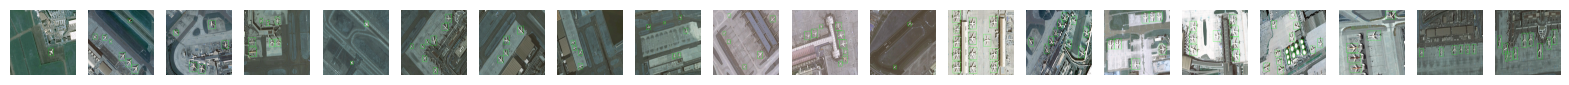

In [4]:
import cv2

# Function to draw bounding boxes on images
def draw_boxes(img, boxes):
    for box in boxes:
        x_min, y_min, x_max, y_max, _ = box
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2) 
    return img

# Example code to draw boxes on the first 5 augmented images
resized_images_with_boxes = []
for img, annot in zip(resized_positive_images[:20], resized_positive_annotations[:20]):
    img_with_boxes = draw_boxes(img.copy(), annot)
    resized_images_with_boxes.append(img_with_boxes)

# Now visualize the images with boxes
fig, axes = plt.subplots(1, 20, figsize=(20, 4))
for ax, img in zip(axes, resized_images_with_boxes):
    ax.imshow(img)
    ax.axis('off')
plt.show()


## Data augmentation on postive images

**Apply All Transformations to a Single Copy**

**Single Combined Augmentation:**

**Pros:** This method can be more efficient in terms of processing time and memory because it generates fewer augmented images. It simulates a more complex transformation that might occur in real-world scenarios, providing a robustness test for the model.

**Cons:** The downside is that it might introduce too much distortion, making it hard for the model to learn useful features. It can also lead to overfitting to specific patterns of combined augmentations if not managed carefully.
Apply Each Transformation to Separate Copies

**Multiple Individual Augmentations:**

**Pros:** This method allows the model to learn from a wider variety of simple changes, potentially improving its ability to generalize from each type of transformation individually. It increases the effective size of the training dataset more significantly, which can be beneficial for training deep learning models.

**Cons:** The main drawback is increased computational and storage requirements since you're generating multiple images for each original image in the dataset. It might also introduce redundancy if the transformations are too mild or too correlated.
Best Practices

**Balanced Approach:** Often, a mix of both strategies is employed. For example, you might apply mild transformations (like slight rotations and flips) individually to generate multiple images and then perform a few combined transformations (like moderate zoom followed by a slight rotation) to create more diverse scenarios.
Experimentation and Validation: It's important to experiment with different strategies and validate their impact on model performance. Monitoring how each type of augmentation affects overfitting, underfitting, and validation accuracy can guide you to optimize the augmentation pipeline.
Resource Management: Consider your computational resources and training time. More images mean longer training times and more disk space. If resources are limited, focusing on the most impactful transformations might be necessary.

# **Single Transformation:**
**Rotation + Horizontal Flip:** This combination can simulate the scenario where objects need to be recognized regardless of their orientation and reflection, which is common in environments where images can come from different perspectives or be mirrored, such as surveillance systems and certain types of automated monitoring.
    
# **Combinations:**
**Zoom + Brightness Adjustment:** This combination handles variations in both distance (zoom) and lighting conditions (brightness). This is particularly useful for applications like outdoor photography or security cameras, where both distance from the object and varying light conditions affect the quality and characteristics of captured images.

**Brightness Adjustment + Vertical Flip:** Combining lighting changes with a vertical flip can simulate conditions where objects might be viewed upside-down in varying light conditions, such as in underwater imaging or aerial photography where light reflections and orientation vary significantly.

**Zoom + Rotation:** This combination can effectively mimic the appearance of objects as they are seen from different distances and orientations. It's particularly useful in applications involving object detection from moving vehicles or drones, where both the distance to objects and their orientation relative to the camera can change quickly.

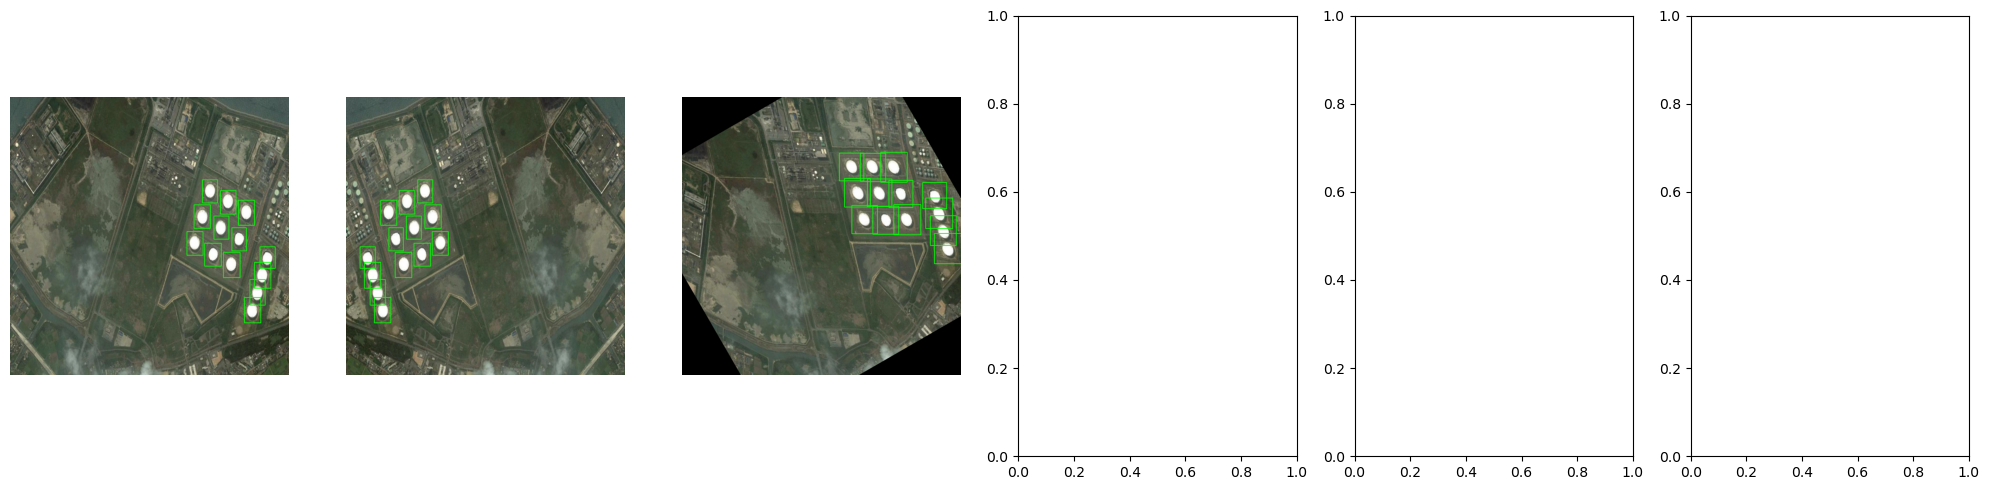

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def adjust_brightness(image, brightness_factor):
    """ Adjust the brightness of an image. """
    return cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)

def calculate_zoomed_bounding_boxes(boxes, zoom_factor, width, height):
    """ Calculate bounding boxes for zoomed images. """
    zoomed_annots = []
    for box in boxes:
        x_min_new = (box[0] - width / 2) * zoom_factor + width / 2
        y_min_new = (box[1] - height / 2) * zoom_factor + height / 2
        x_max_new = (box[2] - width / 2) * zoom_factor + width / 2
        y_max_new = (box[3] - height / 2) * zoom_factor + height / 2
        zoomed_annots.append([x_min_new, y_min_new, x_max_new, y_max_new, box[4]])
    return zoomed_annots

def calculate_rotated_bounding_boxes(boxes, angle, width, height):
    """ Calculate bounding boxes for rotated images. """
    M = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_annots = []
    for box in boxes:
        corners = np.array([
            [box[0], box[1], 1], 
            [box[2], box[1], 1], 
            [box[2], box[3], 1], 
            [box[0], box[3], 1]
        ])
        new_corners = np.dot(M, corners.T).T
        x_min_new, y_min_new = np.min(new_corners[:, :2], axis=0)
        x_max_new, y_max_new = np.max(new_corners[:, :2], axis=0)
        rotated_annots.append([x_min_new, y_min_new, x_max_new, y_max_new, box[4]])
    return rotated_annots

def flip_horizontal(image, boxes):
    """Flip image horizontally and adjust bounding boxes."""
    flipped_image = cv2.flip(image, 1)  # 1 means horizontal flip
    flipped_boxes = []
    for box in boxes:
        x_min, y_min, x_max, y_max, class_id = box
        flipped_x_min = image.shape[1] - x_max
        flipped_x_max = image.shape[1] - x_min
        flipped_boxes.append([flipped_x_min, y_min, flipped_x_max, y_max, class_id])
    return flipped_image, flipped_boxes

def flip_vertical(image, boxes):
    """Flip image vertically and adjust bounding boxes."""
    flipped_image = cv2.flip(image, 0)  # 0 means vertical flip
    flipped_boxes = []
    for box in boxes:
        x_min, y_min, x_max, y_max, class_id = box
        flipped_y_min = image.shape[0] - y_max
        flipped_y_max = image.shape[0] - y_min
        flipped_boxes.append([x_min, flipped_y_min, x_max, flipped_y_max, class_id])
    return flipped_image, flipped_boxes

def generate_augmented_images_and_boxes(original_img, original_annots):
    zoom_factors = [1.2, 1.4, 1.6, 1.8, 2.0]
    angles = [10, 20, 30, -10, -20, -30]
    brightness_factors = [0.5, 0.7, 1.3, 1.5]
    
    augmented_images = []
    augmented_annotations = []

    # 1. Zoom + Rotation 
    #zoom_factor = np.random.choice(zoom_factors)
    #new_width = int(original_img.shape[1] * zoom_factor)
    #new_height = int(original_img.shape[0] * zoom_factor)
    #zoomed_and_rotated_img = cv2.resize(original_img, (new_width, new_height))
    #start_x = (new_width - original_img.shape[1]) // 2
    #start_y = (new_height - original_img.shape[0]) // 2
    #zoomed_and_rotated_img = zoomed_and_rotated_img[start_y:start_y + original_img.shape[0], start_x:start_x + original_img.shape[1]]
    #zoomed_and_rotated_annots = calculate_zoomed_bounding_boxes(original_annots, zoom_factor, original_img.shape[1], original_img.shape[0])
    #angle = np.random.choice(angles)
    #zoomed_and_rotated_img = cv2.warpAffine(zoomed_and_rotated_img, cv2.getRotationMatrix2D((zoomed_and_rotated_img.shape[1] / 2, zoomed_and_rotated_img.shape[0] / 2), angle, 1), (zoomed_and_rotated_img.shape[1], zoomed_and_rotated_img.shape[0]))
    #zoomed_and_rotated_annots = calculate_rotated_bounding_boxes(zoomed_and_rotated_annots, angle, zoomed_and_rotated_img.shape[1], zoomed_and_rotated_img.shape[0])
    #augmented_images.append(zoomed_and_rotated_img)
    #augmented_annotations.append(zoomed_and_rotated_annots)

    # 2. Brightness Adjustment + Vertical Flip:
    # v_flip_img, v_flip_annots = flip_vertical(original_img, original_annots)
    # brightness_factor = np.random.choice(brightness_factors)
    # v_flip_img = adjust_brightness(v_flip_img, brightness_factor)
    # augmented_images.append(v_flip_img)
    # augmented_annotations.append(v_flip_annots)

    # 3. Zoom + Brightness Adjustment:
    # zoom_factor = np.random.choice(zoom_factors)
    # new_width = int(original_img.shape[1] * zoom_factor)
    # new_height = int(original_img.shape[0] * zoom_factor)
    # zoomed_Brightness_img = cv2.resize(original_img, (new_width, new_height))
    # start_x = (new_width - original_img.shape[1]) // 2
    # start_y = (new_height - original_img.shape[0]) // 2
    # zoomed_Brightness_img = zoomed_Brightness_img[start_y:start_y + original_img.shape[0], start_x:start_x + original_img.shape[1]]
    # zoomed_Brightness_annots = calculate_zoomed_bounding_boxes(original_annots, zoom_factor, original_img.shape[1], original_img.shape[0])
    # brightness_factor = np.random.choice(brightness_factors)
    # zoomed_Brightness_img = adjust_brightness(zoomed_Brightness_img, brightness_factor)
    # augmented_images.append(zoomed_Brightness_img)
    # augmented_annotations.append(zoomed_Brightness_annots)

    # Horizontal Flip 
    h_flip_img, h_flip_annots = flip_horizontal(original_img, original_annots)
    augmented_images.append(h_flip_img)
    augmented_annotations.append(h_flip_annots)

    # Rotation augmentation
    angle = np.random.choice(angles)
    rotated_img = cv2.warpAffine(original_img, cv2.getRotationMatrix2D((original_img.shape[1] / 2, original_img.shape[0] / 2), angle, 1), (original_img.shape[1], original_img.shape[0]))
    rotated_annots = calculate_rotated_bounding_boxes(original_annots, angle, original_img.shape[1], original_img.shape[0])
    augmented_images.append(rotated_img)
    augmented_annotations.append(rotated_annots)

    return augmented_images, augmented_annotations

 # Horizontal Flip , Vertical Flip , Rotation augmentation , Brightness adjustment ,Zoom augmentation

def draw_boxes(img, boxes):
    """Draw bounding boxes on an image."""
    for box in boxes:
        x_min, y_min, x_max, y_max, _ = box
        # Convert coordinates to integers
        x_min = int(x_min)
        y_min = int(y_min)
        x_max = int(x_max)
        y_max = int(y_max)
        # Draw rectangle on image
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    return img


def display_augmentations(original_img, original_annot):
    aug_imgs, aug_annots = generate_augmented_images_and_boxes(original_img, original_annot)
    fig, axes = plt.subplots(1, 6, figsize=(20, 5))
    images = [original_img] + aug_imgs
    boxes = [original_annot] + aug_annots
    for ax, img, annots in zip(axes, images, boxes):
        img_with_boxes = draw_boxes(img.copy(), annots)
        ax.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage (assuming you have resized_positive_images and resized_positive_annotations defined)
display_augmentations(resized_positive_images[315], resized_positive_annotations[315])

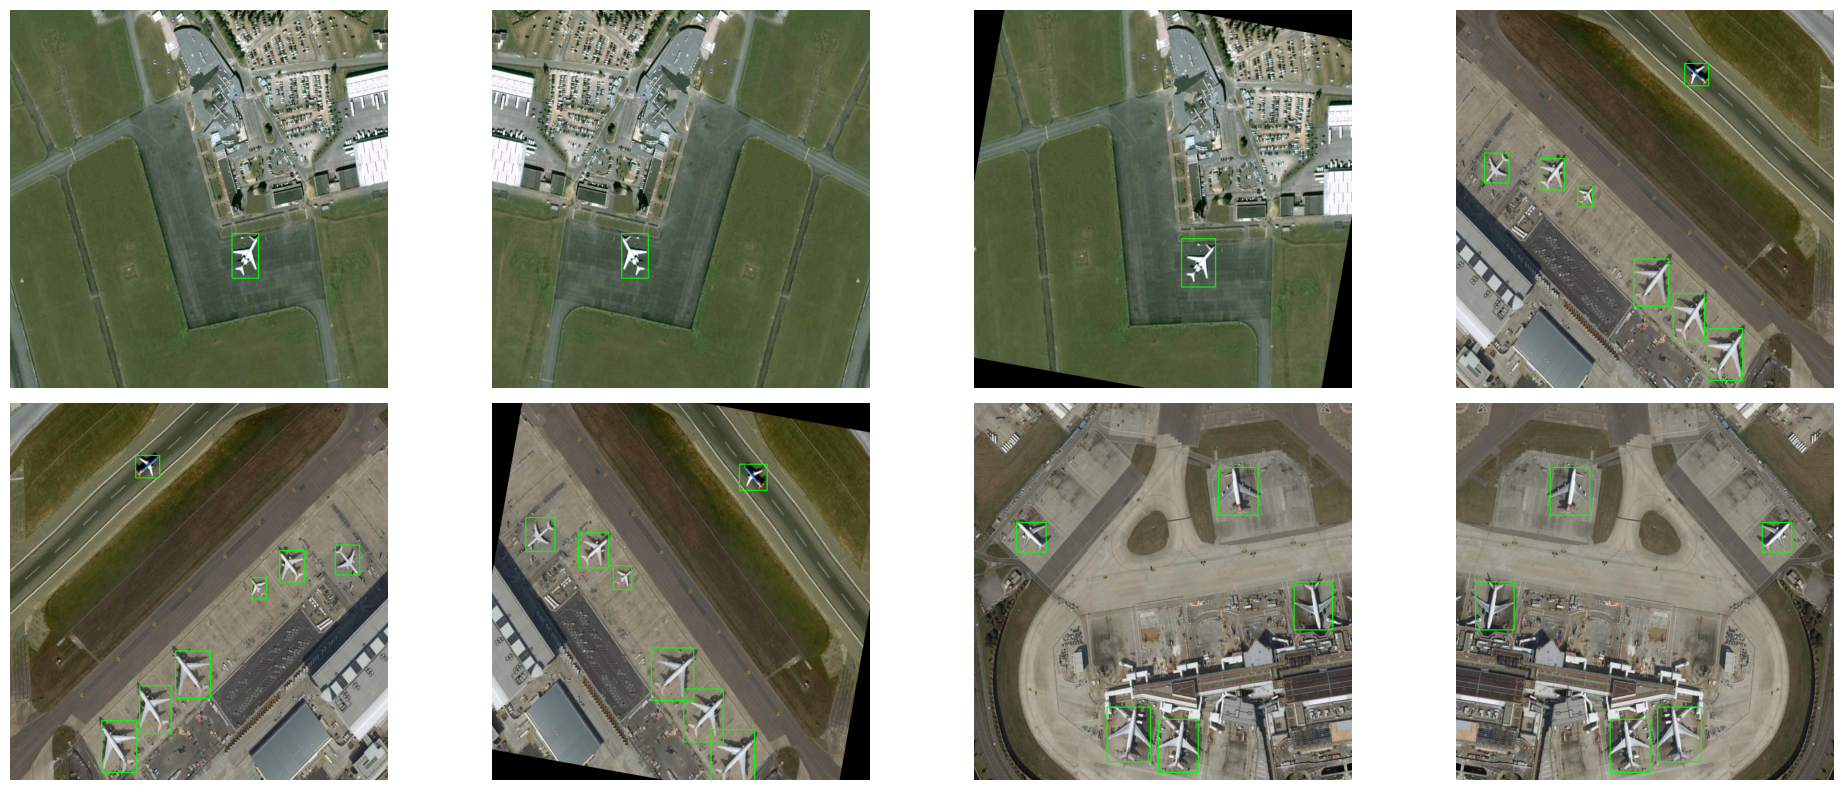

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to hold all images and annotations
all_positive_images = []
all_positive_annotations = []

# Iterate over each image and its corresponding annotations
for img, annots in zip(resized_positive_images, resized_positive_annotations):
    # Generate augmented images and their bounding boxes
    augmented_images, augmented_annotations = generate_augmented_images_and_boxes(img, annots)

    # Append the original image and annotations first
    all_positive_images.append(img)
    all_positive_annotations.append(annots)

    # Extend lists with the augmented images and annotations
    all_positive_images.extend(augmented_images)
    all_positive_annotations.extend(augmented_annotations)

# Draw bounding boxes on the augmented images and display
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for ax, img, boxes in zip(axes.flatten(), all_positive_images, all_positive_annotations):
    img_with_boxes = draw_boxes(img.astype(np.uint8).copy(), boxes)  # Convert to uint8 for plotting
    ax.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    ax.axis('off')
plt.tight_layout()
plt.show()


In [7]:
# Calculate the number of images in all_positive_images and annotation in all_positive_annotations
number_of_images = len(all_positive_images)
number_of_annotation = len(all_positive_annotations)


# Print the result
print("Total number of images Positive images after data augmentation:", number_of_images)
print("Total number of annotations after data augmentation:", number_of_annotation)

Total number of images Positive images after data augmentation: 1950
Total number of annotations after data augmentation: 1950


## Data Augemntation For Negative Imgaes

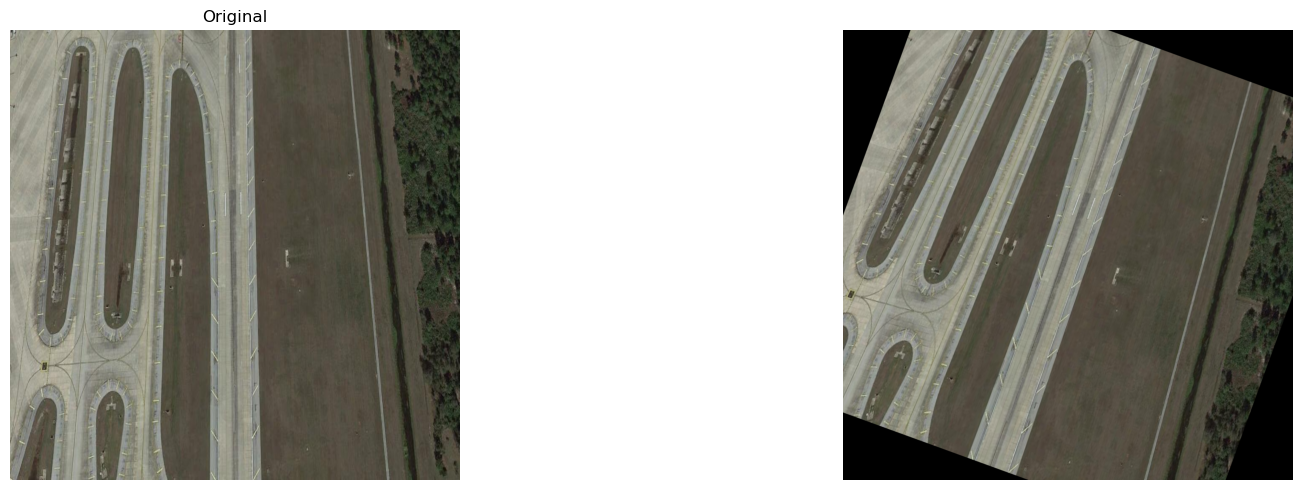

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def adjust_brightness_negative(image, brightness_factor):
    """ Adjust the brightness of an image. """
    return cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)

def flip_horizontal_negative(image):
    """Flip image horizontally."""
    return cv2.flip(image, 1)  # 1 means horizontal flip

def flip_vertical_negative(image):
    """Flip image vertically."""
    return cv2.flip(image, 0)  # 0 means vertical flip

def generate_augmented_images_negative(original_img, zoom_factors, angles, brightness_factors):
    augmented_images = []

    # 1. Zoom + Rotation:
    # zoom_factor = np.random.choice(zoom_factors)
    # new_width = int(original_img.shape[1] * zoom_factor)
    # new_height = int(original_img.shape[0] * zoom_factor)
    # zoomed_rotation_img = cv2.resize(original_img, (new_width, new_height))
    # start_x = (new_width - original_img.shape[1]) // 2
    # start_y = (new_height - original_img.shape[0]) // 2
    # zoomed_rotation_img = zoomed_rotation_img[start_y:start_y + original_img.shape[0], start_x:start_x + original_img.shape[1]]
    # angle = np.random.choice(angles)
    # zoomed_rotation_img = cv2.warpAffine(zoomed_rotation_img, cv2.getRotationMatrix2D((zoomed_rotation_img.shape[1] / 2, zoomed_rotation_img.shape[0] / 2), angle, 1), (zoomed_rotation_img.shape[1], zoomed_rotation_img.shape[0]))
    # augmented_images.append(zoomed_rotation_img)
    
    # 2. Brightness Adjustment + Vertical Flip:
    # v_flip_img = flip_vertical_negative(original_img)
    # brightness_factor = np.random.choice(brightness_factors)
    # v_flip_img = adjust_brightness_negative(v_flip_img, brightness_factor)
    # augmented_images.append(v_flip_img)
    
    # 3. Zoom + Brightness Adjustment:
    # zoom_factor = np.random.choice(zoom_factors)
    # new_width = int(original_img.shape[1] * zoom_factor)
    # new_height = int(original_img.shape[0] * zoom_factor)
    # zoomed_brightness_img = cv2.resize(original_img, (new_width, new_height))
    # start_x = (new_width - original_img.shape[1]) // 2
    # start_y = (new_height - original_img.shape[0]) // 2
    # zoomed_brightness_img = zoomed_brightness_img[start_y:start_y + original_img.shape[0], start_x:start_x + original_img.shape[1]]   
    # brightness_factor = np.random.choice(brightness_factors)
    # zoomed_brightness_img = adjust_brightness_negative(zoomed_brightness_img, brightness_factor)
    # augmented_images.append(zoomed_brightness_img)

    # Rotation augmentation
    angle = np.random.choice(angles)
    rotated_img = cv2.warpAffine(original_img, cv2.getRotationMatrix2D((original_img.shape[1] / 2, original_img.shape[0] / 2), angle, 1), (original_img.shape[1], original_img.shape[0]))
    augmented_images.append(rotated_img)
    
    # Horizontal Flip
    h_flip_img = flip_horizontal_negative(original_img)
    augmented_images.append(h_flip_img)

    return augmented_images

def display_augmentations_negative(original_img):
    zoom_factors = [1.2, 1.4, 1.6, 1.8, 2.0]  # Factors for zooming
    angles = [10, 20, 30, -10, -20, -30]       # Degrees for rotation
    brightness_factors = [0.5, 0.7, 1.3, 1.5]  # Factors for brightness adjustment
    
    aug_imgs = generate_augmented_images_negative(original_img, zoom_factors, angles, brightness_factors)
    fig, axes = plt.subplots(1, len(aug_imgs), figsize=(20, 5))  # Adding original image as well
    axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original")
    axes[0].axis('off')
    
    for ax, img in zip(axes[1:], aug_imgs):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage (assuming you have resized_negative_images defined)
for img in resized_negative_images[:1]:  # Displaying first 5 images for example
    display_augmentations_negative(img)


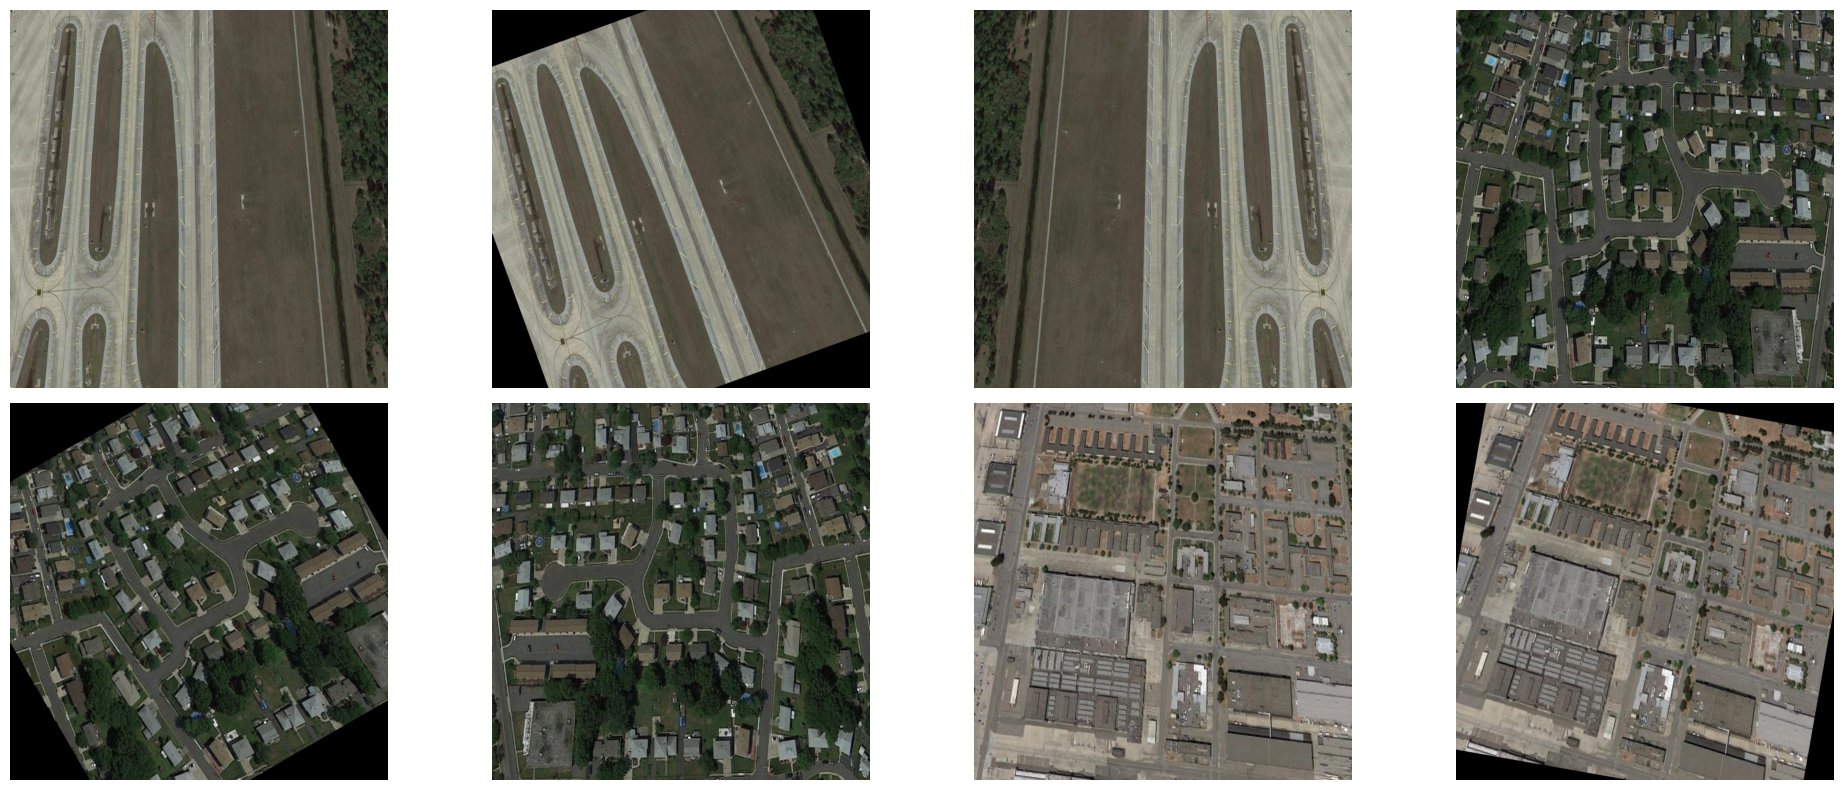

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Ensure OpenCV is imported for image processing

# Initialize lists to hold all negative images
all_negative_images = []

# Iterate over each negative image
for img in resized_negative_images:
    
    zoom_factors = [1.2, 1.4, 1.6, 1.8, 2.0]  # Factors for zooming
    angles = [10, 20, 30, -10, -20, -30]       # Degrees for rotation
    brightness_factors = [0.5, 0.7, 1.3, 1.5]  # Factors for brightness adjustment
    # Generate augmented images
    augmented_images = generate_augmented_images_negative(img, zoom_factors, angles, brightness_factors)

    # Append the original image first
    all_negative_images.append(img)

    # Extend list with the augmented images
    all_negative_images.extend(augmented_images)

# Displaying the original and augmented images
fig, axes = plt.subplots(2, 4, figsize=(20, 8))  # Adjust the subplot grid as necessary
for ax, img in zip(axes.flatten(), all_negative_images[:8]):  # Ensure we don't exceed the grid size
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    ax.axis('off')
plt.tight_layout()
plt.show()


In [10]:
# Calculate the number of images in all_images
number_of_negative_images = len(all_negative_images)

# Print the result
print("Total number of images Negative images after data augmentation:", number_of_negative_images)

Total number of images Negative images after data augmentation: 450


In [13]:
import numpy as np

# Function to determine the maximum number of targets across all positive images
def max_targets_count(all_positive_annotations):
    max_targets = 0
    for annotations in all_positive_annotations:
        num_targets = sum(1 for annot in annotations)/5  # Counting each annotation as a single target
        max_targets = max(max_targets, num_targets)
    return max_targets

# Example usage:
# all_positive_annotations is a list of annotations for all positive images
max_positive_targets = max_targets_count(all_positive_annotations)
print("Maximum number of targets across all positive images:", max_positive_targets)


Maximum number of targets across all positive images: 13.4


## Load And Train ResNet50 Model

Model Finetuning 

In [ ]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, concatenate, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD


def preprocess_and_pad_annotations(annotations, max_objects=13, num_classes=10):
    """Pad annotations to ensure consistent dimensions across all samples."""
    padded_annotations = np.zeros((len(annotations), max_objects, 5 + num_classes), dtype=np.int32)
    
    for i, image_annots in enumerate(annotations):
        for j, annot in enumerate(image_annots):
            if j < max_objects:
                x, y, h, w, class_id = annot
                # Pad annotation with bounding box coordinates
                padded_annotations[i, j, :4] = [x, y, h, w]
                # One-hot encode class_id
                if class_id < num_classes:
                    padded_annotations[i, j, 5 + class_id] = 1
    
    return padded_annotations

# Preprocess and pad positive annotations
positive_annots_train_array = preprocess_and_pad_annotations(positive_annots_train)
positive_annots_test_array = preprocess_and_pad_annotations(positive_annots_test)

# Convert positive images to NumPy arrays
positive_images_train_array = np.array(positive_images_train)
positive_images_test_array = np.array(positive_images_test)


# Assuming negative images don't have annotations or have zeros as placeholders
negative_images_train_array = np.array(negative_images_train)
negative_images_test_array = np.array(negative_images_test)


# Load ResNet50 model with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False)

# Define the IoU calculation for RPN target generation
def convert_to_one_hot(annotations, num_classes):
    """Convert class ID annotations to one-hot encoded format for each image."""
    # Assuming class IDs are stored in the last position of each annotation set
    class_ids = annotations[:, :, 4]  # Extract class IDs
    one_hot_encoded = np.zeros((annotations.shape[0], num_classes))
    
    for i in range(len(class_ids)):
        # Assuming the first valid class ID in each set of annotations is the target class
        valid_ids = class_ids[i][class_ids[i] > 0]
        if len(valid_ids) > 0:
            one_hot_encoded[i, int(valid_ids[0])] = 1
    
    return one_hot_encoded

# Define the RPN layer
def build_rpn(feature_map, num_anchors):
    """Creates a RPN layer using the feature map from the base layer."""
    x = Conv2D(64, (3, 3), padding="same", activation="relu")(feature_map)
    x_class = Conv2D(num_anchors, (1, 1), activation="sigmoid")(x)  # Class prediction
    x_reg = Conv2D(num_anchors * 4, (1, 1), activation="linear")(x)  # BBox regression
    return [x_class, x_reg]

# Add RPN layers after ResNet50
num_anchors = 9  # Example for 3 scales and 3 aspect ratios
rpn_class, rpn_reg = build_rpn(base_model.output, num_anchors)

# Add fully connected layers for classification on top of ResNet50
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)

# Adjust the output layer to match the target shape
num_classes = 11  # Including background class
num_boxes_per_image = 13  # Assuming a fixed number of bounding boxes per image
num_bbox_dims = 4  # Number of dimensions for each bounding box prediction (e.g., x, y, width, height)

# Output layer for bounding box predictions
bbox_predictions = Dense(num_boxes_per_image * num_bbox_dims, activation='linear')(x)
bbox_predictions = Reshape((num_boxes_per_image, num_bbox_dims))(bbox_predictions)

# Output layer for class probabilities
class_predictions = Dense(num_boxes_per_image * num_classes, activation='softmax')(x)
class_predictions = Reshape((num_boxes_per_image, num_classes))(class_predictions)

# Concatenate the predictions for bounding boxes and class probabilities
predictions = concatenate([bbox_predictions, class_predictions], axis=-1)

# Complete model
model = Model(inputs=base_model.input, outputs=[predictions, rpn_class, rpn_reg])

# Strategy 1: Train only the head layer for 30 epochs with learning rate 0.1
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=SGD(learning_rate=0.1, momentum=0.9),
              loss=['categorical_crossentropy', 'mean_squared_error', 'binary_crossentropy'],
              metrics=['accuracy','accuracy','accuracy'])

model.fit(positive_images_train_array, [positive_annots_train_array, dummy_class_targets, dummy_reg_targets], epochs=30, validation_data=(positive_images_test_array, [positive_annots_test_array, dummy_class_targets, dummy_reg_targets]))

# Strategy 2: Train convolution layer (+5) for 30 epochs with learning rate 0.01
for layer in base_model.layers[:-5]:
    layer.trainable = False
for layer in base_model.layers[-5:]:
    layer.trainable = True

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss=['categorical_crossentropy', 'mean_squared_error', 'binary_crossentropy'],
              metrics=['accuracy','accuracy','accuracy'])

model.fit(positive_images_train_array, [positive_annots_train_array, dummy_class_targets, dummy_reg_targets], epochs=30, validation_data=(positive_images_test_array, [positive_annots_test_array, dummy_class_targets, dummy_reg_targets]))

# Strategy 3: Train convolution layer (+4) for 30 epochs with learning rate 0.001
for layer in base_model.layers[:-4]:
    layer.trainable = False
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),
              loss=['categorical_crossentropy', 'mean_squared_error', 'binary_crossentropy'],
              metrics=['accuracy','accuracy','accuracy'])

model.fit(positive_images_train_array, [positive_annots_train_array, dummy_class_targets, dummy_reg_targets], epochs=30, validation_data=(positive_images_test_array, [positive_annots_test_array, dummy_class_targets, dummy_reg_targets]))

# Strategy 4: Train convolution layer (+3) for 400 epochs with learning rate 0.001
for layer in base_model.layers[:-3]:
    layer.trainable = False
for layer in base_model.layers[-3:]:
    layer.trainable = True

model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),
              loss=['categorical_crossentropy', 'mean_squared_error', 'binary_crossentropy'],
              metrics=['accuracy','accuracy','accuracy'])

model.fit(positive_images_train_array, [positive_annots_train_array, dummy_class_targets, dummy_reg_targets], epochs=400, validation_data=(positive_images_test_array, [positive_annots_test_array, dummy_class_targets, dummy_reg_targets]))


In [ ]:
import subprocess
import os

def download_and_copy_torchvision_files():
    # Install pycocotools
    subprocess.run(["pip", "install", "pycocotools", "--quiet"])

    # Clone TorchVision repo
    subprocess.run(["git", "clone", "https://github.com/pytorch/vision.git"])

    # Check if the "vision" directory exists
    if not os.path.exists("vision"):
        raise FileNotFoundError("The 'vision' directory was not created.")

    # Change directory to the cloned repo
    os.chdir("vision")

    # Checkout the desired version
    subprocess.run(["git", "checkout", "v0.3.0"])

    # Copy required files
    files_to_copy = [
        "references/detection/utils.py",
        "references/detection/transforms.py",
        "references/detection/coco_eval.py",
        "references/detection/engine.py",
        "references/detection/coco_utils.py"
    ]
    for file_path in files_to_copy:
        subprocess.run(["cp", file_path, ".."])

    # Change back to the original directory
    os.chdir("..")

# Call the function to download and copy the files
download_and_copy_torchvision_files()

In [1]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from PIL import Image
import numpy as np
# Basic python and ML Libraries
import os
import random
import numpy as np
import pandas as pd
# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# We will be reading images using OpenCV
import cv2

# xml library for parsing xml files
from xml.etree import ElementTree as et

# matplotlib for visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# torchvision libraries
import torch
import torchvision
from torchvision import transforms as torchtrans  
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# these are the helper libraries imported.
from engine import train_one_epoch, evaluate
import utils
import transforms as T

from torch.cuda.amp import GradScaler, autocast

scaler = GradScaler()

from torchvision.transforms import functional as F

In [2]:
class ImagesDataset(torch.utils.data.Dataset):

    def __init__(self, files_dir, width, height,ID,CLASS,BOX, transforms=None):
        self.transforms = transforms
        self.files_dir = files_dir
        self.bbox_dir= bbox_dir
        self.height = height
        self.width = width
        # sorting the images for consistency
        # To get images, the extension of the filename is checked to be jpg
        self.imgs = ID
        self.box=BOX
        self.Class=CLASS


        # classes: 0 index is reserved for background
        self.classes= [_,1,2,3,4,5,6,7,8,9,10]
    def __getitem__(self, idx):
        img_name = self.imgs[idx]
        image_path = os.path.join(self.files_dir, img_name +'.jpg')

        # reading the images and converting them to correct size and color
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
        img_res = cv2.resize(img_rgb, (self.width, self.height), cv2.INTER_AREA)
        #diving by 255
        img_res /= 255.0

        # annotation file
        annot_filename = img_name + '.txt'
        annot_file_path = os.path.join(self.bbox_dir, annot_filename)
        bb=[]
        # cv2 image gives size as height x width
        wt = img.shape[1]
        ht = img.shape[0]
        # convert boxes into a torch.Tensor
        bbox=self.box[idx]
        for box in bbox:
            xmin_corr = (box[0]/wt)*self.width
            xmax_corr = (box[2]/wt)*self.width
            ymin_corr = (box[1]/ht)*self.height
            ymax_corr = (box[3]/ht)*self.height
            bb.append([xmin_corr, ymin_corr, xmax_corr, ymax_corr])
        boxes = torch.as_tensor(bb, dtype=torch.float32)
#         boxes = torch.as_tensor([xmin_corr, ymin_corr, xmax_corr, ymax_corr], dtype=torch.float32)

        # getting the areas of the boxes
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        #area = (boxes[3] - boxes[1]) * (boxes[2] - boxes[0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((boxes.shape[0],), dtype=torch.int64)

        labels = torch.as_tensor(self.Class[idx], dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["area"] = area
        target["iscrowd"] = iscrowd
        # image_id
        image_id=idx
#         image_id = torch.tensor([idx])
        target["image_id"] = image_id


        if self.transforms:
#             print(img_res.shape)
#             print(target['boxes'])
#             print(labels.view(-1))
            sample = self.transforms(image = img_res,
                                     bboxes = target['boxes'],
                                     labels = labels.view(-1))

            img_res = sample['image']
#             img_res = img_res.permute(1, 2, 0)
            target['boxes'] = torch.Tensor(sample['bboxes'])
            target["labels"] = labels.view(-1)
#             target['boxes'] = sample['bboxes']
#             print("---------------------------")
#             print(img_res.shape)
#             print(target['boxes'])
#             print(labels.view(-1))
#             print("----------------------------")
#         print(target)
        return torch.tensor(img_res), target

    def __len__(self):
        return len(self.imgs)

In [3]:
def get_transform(train):

    if train:
        return A.Compose([
                            A.HorizontalFlip(0.5),
                     # ToTensorV2 converts image to pytorch tensor without div by 255
                            ToTensorV2(p=1.0)
                        ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})
    else:
        return A.Compose([
                            ToTensorV2(p=1.0)
                        ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

In [4]:
# defining the files directory and testing directory
files_dir = 'C:\\Users\\azizk\\positive image set'
neg_dir = 'C:\\Users\\azizk\\negative image set'
bbox_dir = 'C:\\Users\\azizk\\ground truth'
random_dir ='C:\\Users\\azizk\\random-test'

In [5]:
def getressources():
        # Chemin vers votre répertoire contenant les fichiers
        repertoire = "C:\\Users\\azizk\\ground truth"

        # Initialisation des listes
        noms_fichiers = []
        box_data = []
        class_data = []

        # Parcours des fichiers dans le répertoire
        for nom_fichier in os.listdir(repertoire):
            chemin_fichier = os.path.join(repertoire, nom_fichier)
            # Vérification que le chemin correspond à un fichier et non à un répertoire
            if os.path.isfile(chemin_fichier):
                nom_sans_extension = os.path.splitext(nom_fichier)[0]
                with open(chemin_fichier, 'r') as f:
                    contenu_fichier = f.read()
                    noms_fichiers.append(nom_sans_extension)
                    lignes = contenu_fichier.strip().split('\n')
                    boxes = []
                    classes = []
                    for ligne in lignes:
                        elements = ligne.split(',')
                        box = [int(elem.strip("() ")) for elem in elements[:4]]
                        classe = int(elements[4])
                        boxes.append(box)
                        classes.append(classe)
                    box_data.append(boxes)
                    class_data.append(classes)

        # Création du DataFrame
#         data = {'ID': noms_fichiers, 'BOX': box_data, 'Class': class_data}
#         df = pd.DataFrame(data)
#         print(df.head())
#         C=[]
#         B=[]
#         I=[]
#         for index, rows in df.iterrows() :
#             Class=rows['Class']
#             Box=rows["BOX"]
#             ID=rows["ID"]
#             for i in range(len(Class)):
#                 B.append(Box[i])
#                 C.append(Class[i])
#                 I.append(ID)
#         data = {'ID': I, 'BOX': B, 'Class': C}
#         df = pd.DataFrame(data)
#         return(I,B,C)
        return(noms_fichiers,box_data,class_data)

In [6]:
ID,BOX,CLASS=getressources() 

In [7]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

In [8]:
def get_transform(train):
    if train:
        return A.Compose([
            A.HorizontalFlip(p=0.5),
            # ToTensorV2 converts image to pytorch tensor without div by 255
            ToTensorV2(p=1.0)
        ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})
    else:
        return A.Compose([
            ToTensorV2(p=1.0)
        ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})


In [18]:
# Transformation for image resizing and normalization
transform = transforms.Compose([
    transforms.Resize((1024, 1024)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create dataset instances
dataset = ImagesDataset(files_dir, 1024, 1024,ID,CLASS,BOX,transforms= get_transform(train=True))
dataset_test = ImagesDataset(files_dir, 1024, 1024,ID,CLASS,BOX,transforms= get_transform(train=False))

# split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()

# train test split

test_split = 0.2
tsize = int(len(dataset)*test_split)
dataset = torch.utils.data.Subset(dataset, indices[:-tsize])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-tsize:])



# Data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=10, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=10, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

# Model setup
def get_object_detection_model(num_classes):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model



num_classes = 11  # Including background
model = get_object_detection_model(num_classes)

# Move model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Optimizer and learning rate scheduler
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)


In [20]:
# Training and evaluation loop
num_epochs = 1
validate_every = 1  # Validate every 5 epochs
for epoch in range(num_epochs):
    # training for one epoch
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)


Epoch: [0]  [ 0/80]  eta: 0:04:04  lr: 0.000068  loss: 4.3728 (4.3728)  loss_classifier: 2.4603 (2.4603)  loss_box_reg: 0.9043 (0.9043)  loss_objectness: 0.8708 (0.8708)  loss_rpn_box_reg: 0.1375 (0.1375)  time: 3.0549  data: 0.0609
Epoch: [0]  [10/80]  eta: 0:03:15  lr: 0.000701  loss: 3.1390 (2.7951)  loss_classifier: 2.0520 (1.7916)  loss_box_reg: 0.8038 (0.6973)  loss_objectness: 0.2045 (0.2670)  loss_rpn_box_reg: 0.0266 (0.0392)  time: 2.7951  data: 0.0198
Epoch: [0]  [20/80]  eta: 0:02:54  lr: 0.001333  loss: 1.6217 (2.0419)  loss_classifier: 0.7636 (1.1836)  loss_box_reg: 0.7123 (0.6285)  loss_objectness: 0.0959 (0.1976)  loss_rpn_box_reg: 0.0171 (0.0321)  time: 2.9068  data: 0.0173
Epoch: [0]  [30/80]  eta: 0:02:31  lr: 0.001965  loss: 0.9996 (1.6896)  loss_classifier: 0.3218 (0.9037)  loss_box_reg: 0.6123 (0.6008)  loss_objectness: 0.0689 (0.1551)  loss_rpn_box_reg: 0.0149 (0.0301)  time: 3.1700  data: 0.0192
Epoch: [0]  [40/80]  eta: 0:02:02  lr: 0.002597  loss: 0.9188 (1.503

In [21]:
import pickle

In [22]:
Filename = "FRCNN2.pkl" 

In [23]:
# Save the Modle to file in the current working directory
with open(Filename, 'wb') as file:  
    pickle.dump(model, file)

In [24]:
# Load the Model back from file
with open(Filename, 'rb') as file:  
    model = pickle.load(file)
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [25]:
# function to convert a torchtensor back to PIL image
def torch_to_pil(img):
    return torchtrans.ToPILImage()(img).convert('RGB')

In [36]:
# pick one image from the test set
img, target = dataset_test[10]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])[0]
    
print('predicted #boxes: ', prediction['labels'])
print('real #boxes: ', target['labels'])

predicted #boxes:  tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 1,
        1, 4])
real #boxes:  tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


EXPECTED OUTPUT


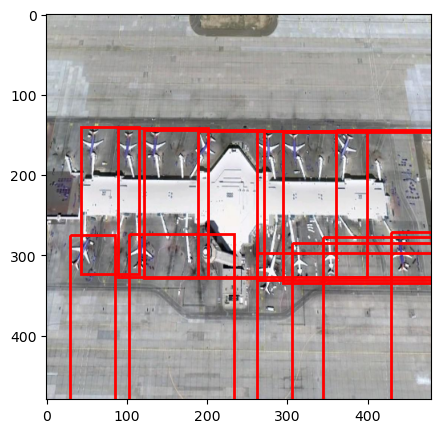

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_img_bbox(img, target):
    # Convert PIL Image to NumPy array
    img_array = np.array(img)

    # Permute dimensions if it's a PyTorch tensor
    if isinstance(img_array, torch.Tensor):
        img_array = img_array.permute(1, 2, 0)

    # Plot the image and bounding boxes
    fig, a = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    a.imshow(img_array)
    for box in target['boxes']:
        x, y, w, h = box
        rect = plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=2)
        a.add_patch(rect)
    plt.show()

print('EXPECTED OUTPUT')
plot_img_bbox(torch_to_pil(img), target)


In [38]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_img_bbox(img, target):
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(5, 5)
    a.imshow(img)
#     print(target['boxes'])
    for box in target['boxes']:
        x, y, w, h = box.cpu().numpy()  # Move the tensor to CPU and convert to NumPy array
#         print("-------x------------")
#         print(x)
#         print("-------y------------")
#         print(y)
#         print("-------w------------")
#         print(w)
#         print("-------h------------")
#         print(h)
        width, height  = w-x, h-y
        rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
        a.add_patch(rect)
    plt.show()

MODEL OUTPUT


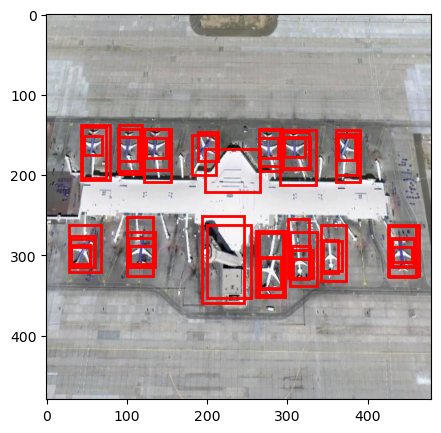

In [39]:
print('MODEL OUTPUT')
plot_img_bbox(torch_to_pil(img), prediction)

In [ ]:
# the function takes the original prediction and the iou threshold.

def apply_nms(orig_prediction, iou_thresh=0.3):
    
    # torchvision returns the indices of the bboxes to keep
    keep = torchvision.ops.nms(orig_prediction['boxes'], orig_prediction['scores'], iou_thresh)
    
    final_prediction = orig_prediction
    final_prediction['boxes'] = final_prediction['boxes'][keep]
    final_prediction['scores'] = final_prediction['scores'][keep]
    final_prediction['labels'] = final_prediction['labels'][keep]
    
    return final_prediction

NMS APPLIED MODEL OUTPUT


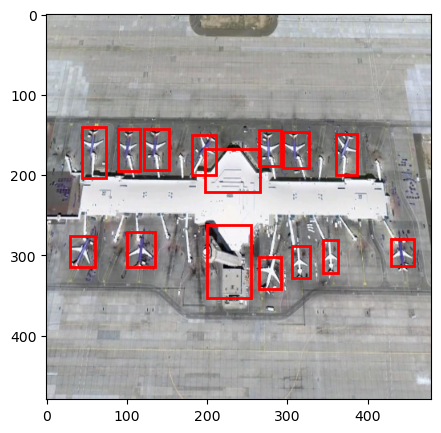

In [40]:
nms_prediction = apply_nms(prediction, iou_thresh=0.2)
print('NMS APPLIED MODEL OUTPUT')
plot_img_bbox(torch_to_pil(img), nms_prediction)